In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

Using TensorFlow backend.


In [3]:
train_path = 'C:/Users/User/Downloads/TBS/train'
valid_path = 'C:/Users/User/Downloads/TBS/valid'
test_path = 'C:/Users/User/Downloads/TBS/test'

In [4]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes = ['normal','TB'], batch_size = 99)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes = ['normal','TB'], batch_size = 4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes = ['normal','TB'], batch_size = 70)

Found 99 images belonging to 2 classes.
Found 39 images belonging to 2 classes.
Found 141 images belonging to 2 classes.


In [5]:
imgs, labels = next(train_batches)

In [6]:
vgg16_model = keras.applications.vgg16.VGG16()

W0927 19:20:25.996182 11204 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0927 19:20:26.198383 11204 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0927 19:20:26.297270 11204 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0927 19:20:26.475822 11204 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0927 19:21:08.031430 11204 deprecation_wrapper.py:119] From C:\Users\User\Anaconda

In [7]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [10]:
model.layers.pop()

In [11]:
#for layer in model.layers:
    #layer.trainable = False

In [12]:
model.add(Dense(2, activation='softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [14]:
model.compile(Adam(lr=0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])

W0927 19:21:58.322665 11204 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [15]:
model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=50, verbose=0)

W0927 19:22:02.228459 11204 deprecation.py:323] From C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
test_images, test_labels = next(test_batches)


In [23]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

Confusion matrix, without normalization
[[18  6]
 [ 0 46]]
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86        24
         1.0       0.88      1.00      0.94        46

    accuracy                           0.91        70
   macro avg       0.94      0.88      0.90        70
weighted avg       0.92      0.91      0.91        70



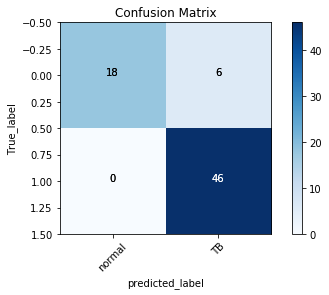

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion_Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    thresh = cm.max() / 2.
    
    for i,j in itertools.product( range(cm.shape[0]),range(cm.shape[1])):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
            
    plt.tight_layout()
    plt.ylabel('True_label')
    plt.xlabel('predicted_label')
#
cm = confusion_matrix(test_labels[:,0], predictions[:,0])
cm_plot_labels = ['normal','TB']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')






from sklearn.metrics import classification_report
from sklearn import metrics
metrics.accuracy_score(test_labels[:,0],predictions[:,0])
print(classification_report(test_labels[:,0],predictions[:,0]))


In [25]:
print("k")


k
